# 必要なパッケージ（拡張機能）の読み込み

`library()` 関数を使う

In [1]:
library(tidyverse)

Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘tibble’”
Warning message:
“replacing previous import ‘lifecycle::last_warnings’ by ‘rlang::last_warnings’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_unnamed’ by ‘rlang::check_dots_unnamed’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_used’ by ‘rlang::check_dots_used’ when loading ‘hms’”
Warning message:
“replacing previous import ‘ellipsis::check_dots_empty’ by ‘rlang::check_dots_empty’ when loading ‘hms’”
── Attaching packa

In [2]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




# ファイルの読み込み

- `read_csv()` コマンドを使う
    - `col_names=TRUE` はファイルの１行目がヘッダー行（列名が書いてある）であるという指定
- `df1` という名前のオブジェクトに読み込んだデータをデータフレーム（表）として代入


In [3]:
df1 <- read_csv("data/newly_confirmed_cases_daily_20220121.csv", col_names=TRUE)


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  Date = col_character()
)
ℹ Use `spec()` for the full column specifications.



# 読み込んだファイルの中身の確認

- `head()` 関数は、オブジェクトの最初の数行を出力に表示してくれる
- ファイルを読み込んだ後はこのように中身を確認することで、意図通りのデータ構造になっているか、文字化けがないかなどを確認できる

In [4]:
head(df1)

Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,⋯,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020/1/16,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020/1/17,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020/1/18,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020/1/19,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020/1/20,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020/1/21,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# 列のデータ型（クラス）の変更

- 直上で `Date` という列の下に `<chr>` と書いてある。これはこの列が「文字列（character)」というデータ型になっていることを示している。
- 後の解析では、この `Date` 
- `mutate()` コマンドは列を追加したり、別の列に入れ替えたりできる。
    - ここでは、 `Date` 列の内容を `as_date()` という関数で「Date（日付）」型に変換した上で `Date` 列を書き換えている
    - → 結果として、再び `head()` コマンドで中身を確認した際には `Date`列のところに `<date>` と表記される（先ほどは `<chr>` だった）。これにより、 「Date（日付）」型に変換されたことが確認できる。
    
    
### パイプ記号 (`%>%`) について
- Rでのデータ解析では複数の関数を順繰りに適用していくことが多い。
    - つまり、ある関数の出力を別の関数の入力にすることを繰り返す。
- この際、関数を入れ子にした書き方だと読みづらい
    - 例えば、 `f()`, `g()`, `h()` という関数を `x` というオブジェクトにかけるとすると、 `h(g(f(x)))`
- そこでパイプ記号 (`%>%`)を用いることで読みやすくする（可読性を高める）。
    - パイプ記号の左側が入力で、右側が出力になっている。
    - 上の例では、`f(x) %>% g() %>% h()` といった書き方ができる
- オブジェクト自体をパイプ記号 (`%>%`)の左側に置くこともできる
    - 上の例では、 `x %>% f() %>% g() %>% h()` といった書き方ができる
- パイプでつながった部分はひとまとまりと（Rに）解釈される
    - 上の例では、最終的な出力を `result` に代入したい場合、 `result <- x %>% f() %>% g() %>% h()`と書いても、 `result <- h(g(f(x)))` と書いても同じと解釈される。
- パイプの後ろ（右側）に改行を入れても、改行が入っていないのと同じように解釈される
- 下では、
    - `df1` を `mutate()`関数の入力にしているので、 `mutate(df1, Date = as_date(Date))` という書き方もできる
    - 下では代入操作について、 `df1 <- mutate(df1, Date = as_date(Date))` という書き方もできる

In [5]:
df1 <- df1 %>%
    mutate(Date = as_date(Date))

In [6]:
head(df1)

Date,ALL,Hokkaido,Aomori,Iwate,Miyagi,Akita,Yamagata,Fukushima,Ibaraki,⋯,Ehime,Kochi,Fukuoka,Saga,Nagasaki,Kumamoto,Oita,Miyazaki,Kagoshima,Okinawa
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2020-01-16,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-17,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-18,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-19,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-20,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2020-01-21,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# データの変換：横長のデータから縦長のデータへ

- 「tidyなデータ」（タイディーと読む）にしたい
- 「tidyなデータ」とは、簡単に説明すると、「同じ種類の数値」が１つの列に収まっていること
    - tidyなデータは人間には読みづらいことが多いが、計算機にとっては読みやすい
- 具体例で説明すると、上の `df1` は **tidyではない**と言える。
    - なぜなら、
    
    
### `select()` 関数
- `select()` 関数はデータフレームから特定の列だけを抽出する
    - 下では、`Date`, `Tokyo`, `Ibaraki` という３つの列を抽出している
    - `pivot_longer()` を使うときに、 `select()` を使わないといけないわけではなく、単に今回は後で `Tokyo` と `Ibaraki` のデータのみを使うからそうしているだけ。

In [7]:
df1long <- df1 %>%
                        select(Date, Tokyo, Ibaraki) %>%
                        pivot_longer(c(Tokyo, Ibaraki), names_to = "Place", values_to = "N_positive")

head(df1long)

Date,Place,N_positive
<date>,<chr>,<dbl>
2020-01-16,Tokyo,0
2020-01-16,Ibaraki,0
2020-01-17,Tokyo,0
2020-01-17,Ibaraki,0
2020-01-18,Tokyo,0
2020-01-18,Ibaraki,0


In [8]:
df1long %>% 
    summarise(summary(N_positive))

summary(N_positive)
<table>
0.000
19.000
236.000
2177.904
1556.750
40406.000


# 列の追加：曜日を追加

- `mutate()` は列の追加ができる（前述）
- `wday()` は第1引数に設定された日付を曜日に変換できる

確認
- 下では、 `head()` で `Day` という列が追加されたこと、その内容が曜日（の英語３文字表記）であることを確認した

In [9]:
df1long <- df1long %>%
    mutate(Day = wday(Date, label = TRUE, abbr = TRUE))

head(df1long)

Date,Place,N_positive,Day
<date>,<chr>,<dbl>,<ord>
2020-01-16,Tokyo,0,Thu
2020-01-16,Ibaraki,0,Thu
2020-01-17,Tokyo,0,Fri
2020-01-17,Ibaraki,0,Fri
2020-01-18,Tokyo,0,Sat
2020-01-18,Ibaraki,0,Sat


# 図のプロット：準備

- Jupyter notebook 特有で必要になるコマンド。図がプロットされる領域のサイズを変更するのに使用する。

In [10]:
options(repr.plot.width=12, repr.plot.height=6)

# 図のプロット：普通の折れ線グラフ

- x軸に日付、y軸に茨城県の新規感染者数の数 (`Ibaraki`）の列の数値を設定した折れ線グラフを作りたい


`ggplot()` コマンドを使用する
- 第１引数にデータフレームを設定する。
    - ここでは、 先ほど読み込んだりした `df1` を設定している
- 第２引数に `aes()` によって「データフレームの各列をどのように使いたいか」を指定する
    - ここでは、x軸に日付 (`Date`)、y軸に茨城県の新規感染者数の数 (`Ibaraki`）の列の数値を設定
- `ggplot()` コマンドは単独で使われることはなく、「どんな形のグラフを書きたいか（geometry）」を表す `geom_` で始まる関数を一緒に使う。
    - ここでは、折れ線グラフを表す `geom_line()` を使用する
- ggplot() コマンド とそのほかのコマンドは `+` (プラス記号) でつなげることで、順次組み合わせて適用することを表す

`ggplot()` コマンド の出力
- ここでは、ggplot() コマンド の出力を `g1` というオブジェクトに代入している
- その上で、 `plot(g1)` で、 `g1`に代入されたプロットの内容を描画（plot）している

### よくない例

- これだと、 `Tokyo` と `Ibaraki` のデータが混ざっている

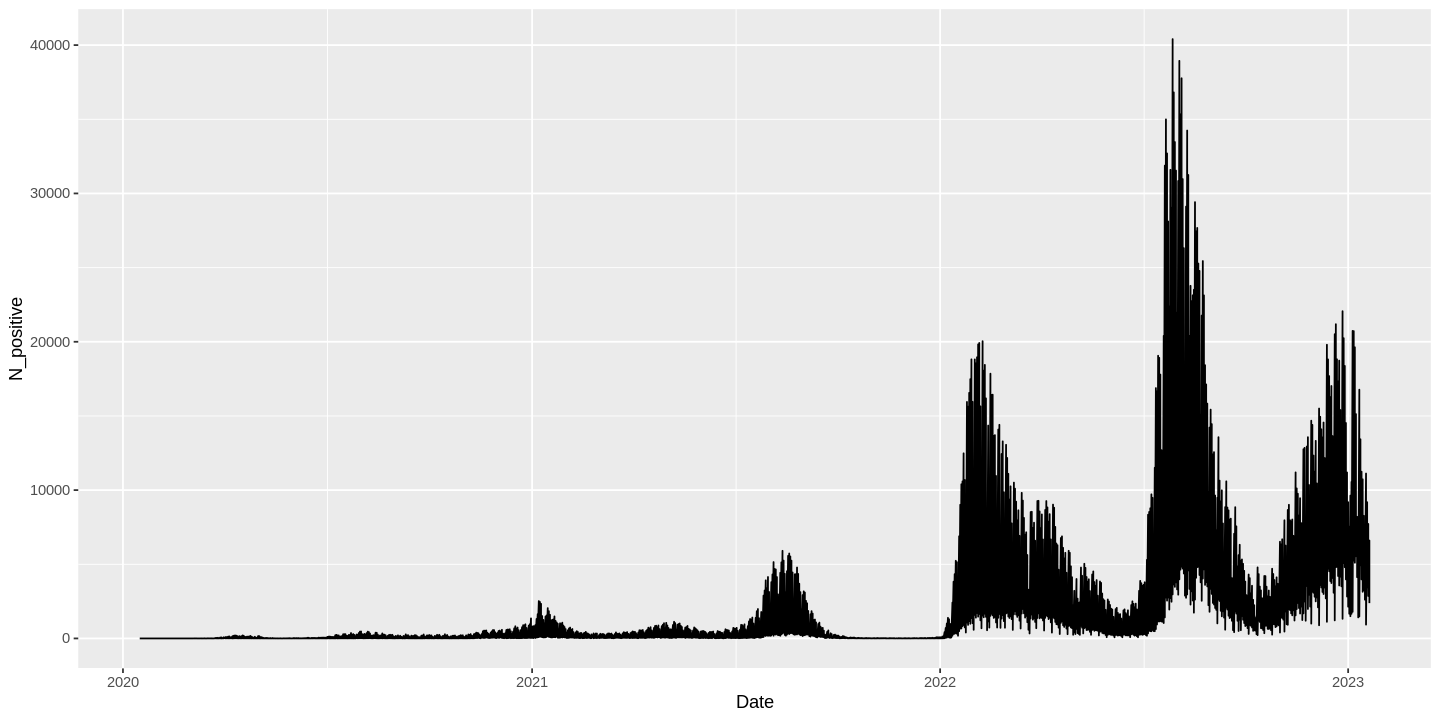

In [11]:
g1 <- ggplot(df1long, aes(x=Date, y=N_positive)) + geom_line()

plot(g1)

### `Place` の値によってデータを分けて折れ線グラフをプロットする

- `Place` 列が `Tokyo` と `Ibaraki` のデータを **分けて** 折れ線グラフにしたい
- １つの方法は `ggplot()` 関数の中の `aes()` に、 `color=Place` をつけること
    - これにより、 `Place`列の値によってデータを分けて色の異なる折れ線で表示できるようになる 

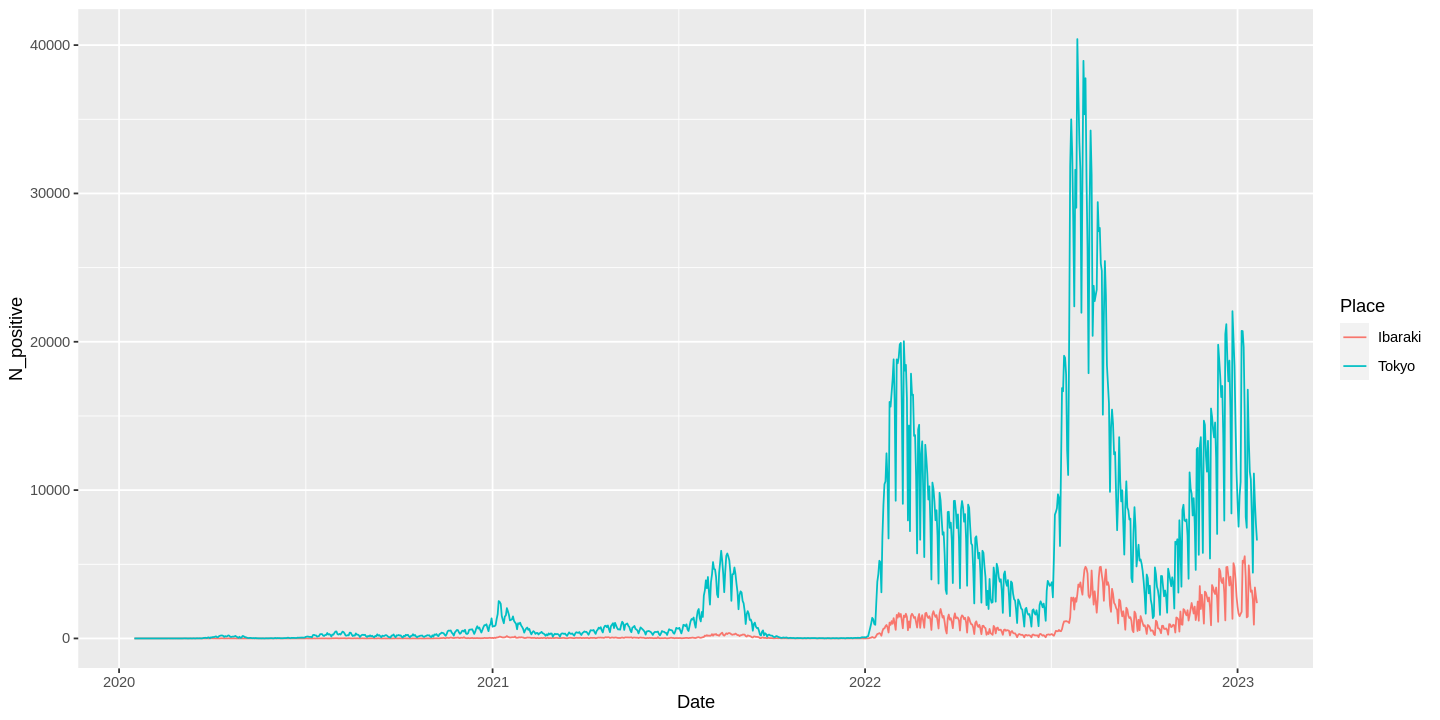

In [12]:
g2 <- ggplot(df1long, aes(Date, N_positive, color=Place)) + geom_line()

plot(g2)

# データフレームのうち、特定の条件に当てはまる行を抽出する

### `filter()` について

-  `filter()` によって特定の条件に当てはまる行を抽出することができます
- 条件は複数設定できます
    - その際、２つの条件を `&` で結ぶと「かつ」(and)という意味で、２つの条件の**全てに**合致する行だけ抽出できます
    - その際、２つの条件を `|` で結ぶと「または」（or）という意味で、２つの条件の**いずれかに**合致する行だけ抽出できます
- 下では２つの条件を `&` で結んでいます
    - １つ目の条件は `Date > "2022-06-01"` です
    - ２つ目の条件は `Date < "2022-09-30"` です



### `dim()` について

- `dim()` はデータフレームや行列の行数や列数を出力する関数です
- 例えば下では、２つの数字を返しています。
    - １つ目が行数、２つ目が列数です
    - なので、 `filter()` を適用して特定の

### `print()` について

- `print()` はオブジェクトの中身や出力結果を出力（print）する関数です

### 下のコードについて

- `Date` が　"2022-06-01"より大きく、 "2022-09-30"より小さい行だけを抽出します
- 元のデータフレーム `df1` からこの条件に合致する行だけのデータフレームを `df1long_sub` に保存しています
- `dim(df1long_sub)` で 240 行になっていることがわかります
- `dim(df1long)` で元のデータフレーは 2202行であることがわかります

In [13]:
df1long_sub <- df1long %>% 
                                filter(Date > "2022-06-01" & Date < "2022-09-30")

print(dim(df1long_sub))

[1] 240   4


In [14]:
print(dim(df1long))

[1] 2202    4


### データフレームを差し替えてプロット

- 上のコード例では全て `ggplot()` 関数の第１引数が `df1` であった
- 下では `ggplot()` 関数の第１引数が `df1`から `df1long_sub` に差し替える
    - `df1long_sub` は"2022-06-01"より大きく、 "2022-09-30"より小さい行だけを抽出したものである
    - なので、以下のグラフはこの特定の範囲についてのプロットになる

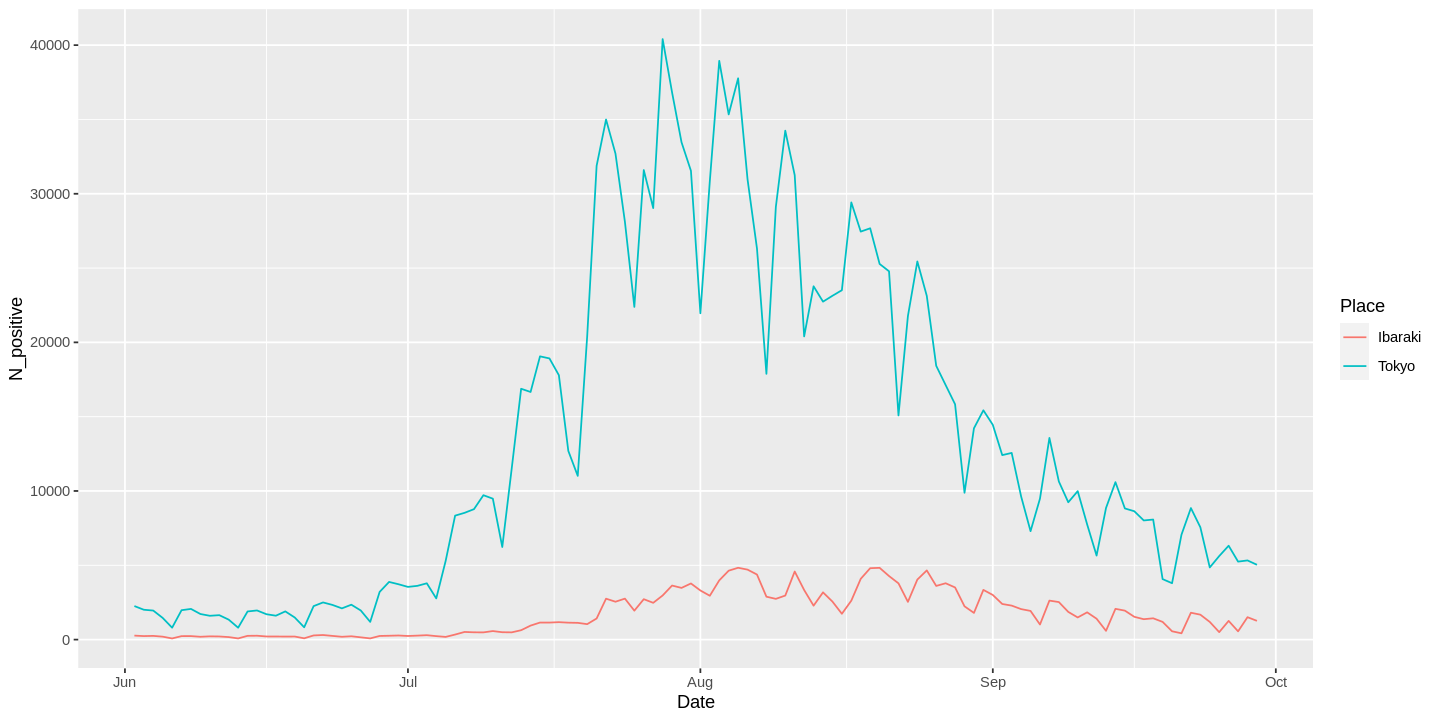

In [15]:
g3 <- ggplot(df1long_sub, aes(Date, N_positive, color=Place)) + geom_line()

plot(g3)

# データを特定の列の属性で分けてプロット

### `facet_grid()` について

- `facet_grid()` 関数を使うと、 `ggplot()` での描画をスムーズにできる
- `facet_grid()`関数の第１引数において、 `~` の前と後ろに別々の列名を設定すると、２つの列の値に応じてデータを分けてプロットできる
    - `~` の前は、プロットを並べたときの行方向（縦方向、row）を表す
    - `~` の後ろは、プロットを並べたときの列方向（横方向、column）を表す
- また、 `~` のどちらかに列名を指定したくない場合は、`.` ピリオドを指定する
- 下では、行方向に `Place`を指定し、列方向に `.` をしている
    - 行方向（縦）では、 `Place` の値にが異なるデータを分けて表現する
    - 列方向（横）では特に何も分けない

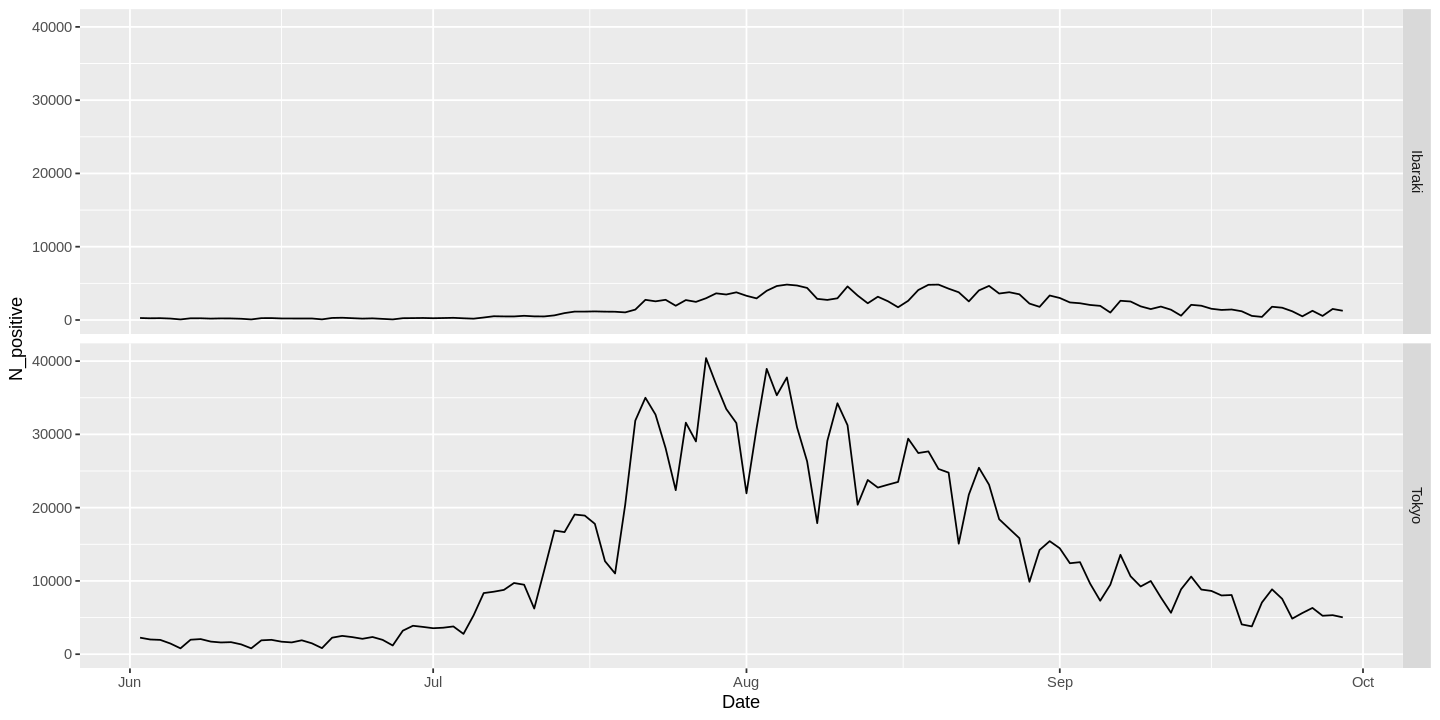

In [16]:
g4 <- ggplot(df1long_sub, aes(Date, N_positive)) + geom_line() +
            facet_grid(Place~.)

plot(g4)

### `facet_grid()` の `scales = "free_y"` オプション

- `facet_grid()` の `scales = "free_y"` オプションを使うと、y軸の範囲をプロットごとに変えて表示できる

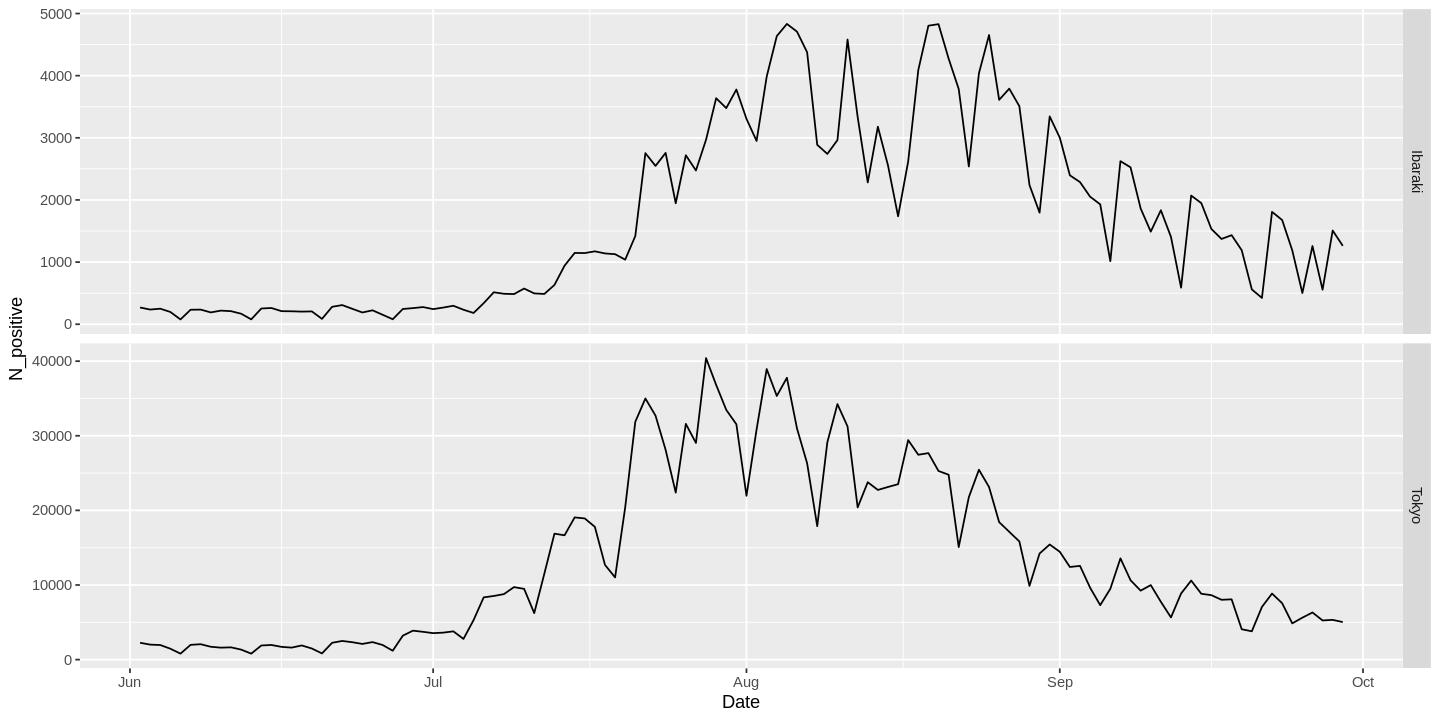

In [17]:
df1long_sub <- df1long %>% filter(Date > "2022-06-01" & Date < "2022-09-30")

g5 <- ggplot(df1long_sub, aes(Date, N_positive)) + geom_line() +
            facet_grid(Place~., scales = "free_y")

plot(g5)

### `color=Day` と指定することで、曜日によってデータを変えられる

- `ggplot()` の中の `aes()` の中で  `color=Day`と追加することで、曜日ごとのデータを折れ線グラフの色を変えた形で表示する


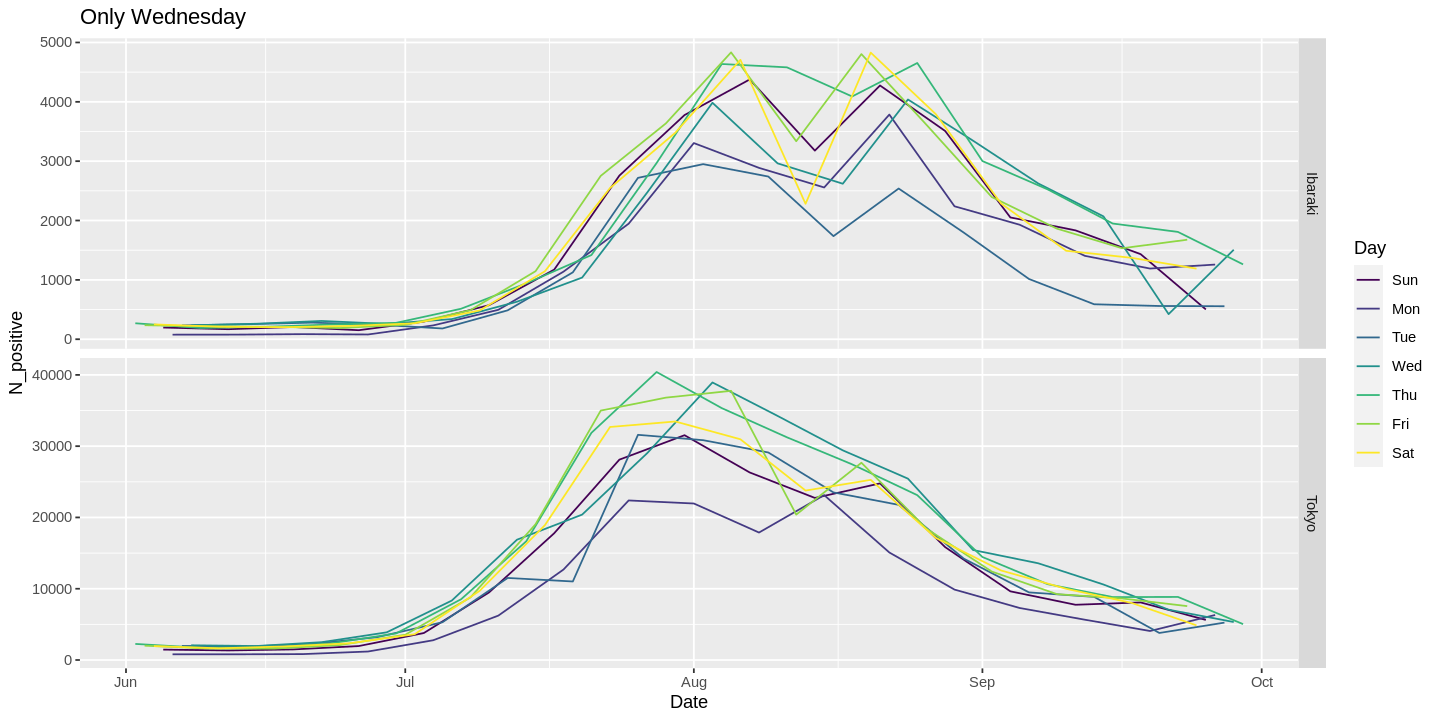

In [18]:
g7 <- ggplot(df1long_sub, aes(Date, N_positive, color=Day)) + geom_line() + 
            facet_grid(Place~., scales = "free_y") +
            labs(title = "Only Wednesday")


plot(g7)

### `facet_grid()` の行方向 (row) と列方向 (column) で２種類の列を指定する

- `facet_grid()`関数の第１引数において、 `~` の前と後ろに別々の列名を設定すると、２つの列の値に応じてデータを分けてプロットできる
    - `~` の前は、プロットを並べたときの行方向（縦方向、row）を表す
    - `~` の後ろは、プロットを並べたときの列方向（横方向、column）を表す
- 下では、行方向に `Place`、列方向に `Day` を並べ、それぞれの列の値の「組み合わせ」
    - 例えば、`Place` が `Ibaraki` であり、 `Day`が `Sun` であるデータのみでの折れ線グラフを表す

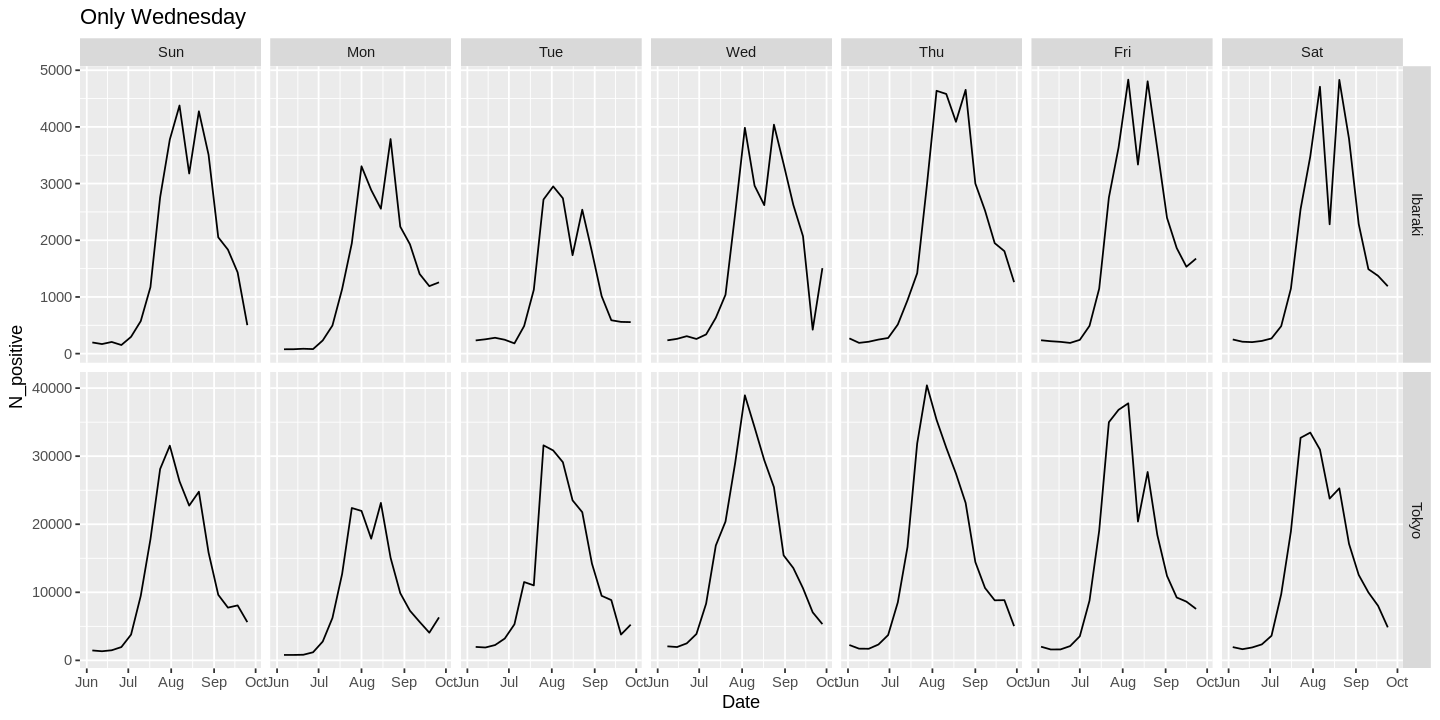

In [19]:
df1long_sub3 <- df1long %>% filter(Date > "2022-06-01" & Date < "2022-09-30")

g8 <- ggplot(df1long_sub3, aes(Date, N_positive)) + geom_line() + 
            facet_grid(Place~Day, scales = "free_y") +
            labs(title = "Only Wednesday")

plot(g8)

# おさらい

### 学んだ関数

**演算子系**

- `<-`: 代入演算子
- `%>%`: パイプ演算子（パイプ記号)。関数の出力を次の関数の入力に設定する。コードの可読性を高かめる。

**パッケージ（拡張機能）系**

- `library()`: パッケージ（拡張機能）を読み込む

**一般的な関数**

- `head()`: データオブジェクトの最初の方を出力する
- `dim()`: データフレームや行列の行数や列数を調べる

**データフレーム系**

- `read_csv()`: CSVファイルを読み込む
- `mutate()`: 列の追加、書き換えなど
- `select()`: 特定の列を抽出する
- `filter()`: 特定の条件に当てはまる行を抽出する
- `pivot_longer()`: 横長のデータを縦長にする


**`lubridate`パッケージ（日付や時刻を扱う）系**

- `as_date()`: 文字列などを日付型（`Date`）に変更する
- `wday()`: 日付を曜日（week day)に変換する

**`ggplot`パッケージ（プロット）系**

- `ggplot()`
- `geom_line()`: 折れ線グラフ
- `facet_grid()`: データを特定の列で分けてプロットする
- `labs()`: 図のタイトルなどを指定する
